<a href="https://colab.research.google.com/github/Jih00nJung/assignment_list/blob/main/GAN2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. StarGAN v2 레포지토리 클론
!git clone https://github.com/clovaai/stargan-v2.git
%cd stargan-v2/

# 2. 필요한 라이브러리 확인 (Colab에는 이미 대부분 설치되어 있습니다)
import torch
import torchvision
print(f"PyTorch Version: {torch.__version__}")
print(f"Torchvision Version: {torchvision.__version__}")

Cloning into 'stargan-v2'...
remote: Enumerating objects: 269, done.
remote: Total 269 (delta 0), reused 0 (delta 0), pack-reused 269 (from 1)
Receiving objects: 100% (269/269), 38.86 MiB | 16.97 MiB/s, done.
Resolving deltas: 100% (60/60), done.
/content/stargan-v2
PyTorch Version: 2.9.0+cu126
Torchvision Version: 0.24.0+cu126


In [2]:
import os
from torchvision.datasets import FashionMNIST
from PIL import Image
from tqdm import tqdm

# 데이터 저장 경로 설정
root_dir = '/content/stargan-v2/data/fashion'
os.makedirs(root_dir, exist_ok=True)

# 1채널(흑백) -> 3채널(RGB)로 변환하여 저장하는 함수
def save_dataset(dataset, mode='train'):
    print(f"Processing {mode} dataset...")
    for idx, (image, label) in enumerate(tqdm(dataset)):
        # 도메인(클래스)별 폴더 생성 (예: data/fashion/train/0, data/fashion/train/1 ...)
        label_dir = os.path.join(root_dir, mode, str(label))
        os.makedirs(label_dir, exist_ok=True)

        # 1채널 이미지를 3채널로 변환 (StarGAN v2 입력 형식을 맞추기 위함)
        image_rgb = image.convert("RGB")

        # 이미지 저장 (리사이즈는 학습 단계에서 transforms로 처리)
        save_path = os.path.join(label_dir, f"{idx:05d}.png")
        image_rgb.save(save_path)

# Fashion MNIST 다운로드 및 변환 실행
# (train=True -> 학습용, train=False -> 테스트용)
train_data = FashionMNIST(root='./tmp', train=True, download=True)
test_data = FashionMNIST(root='./tmp', train=False, download=True)

save_dataset(train_data, mode='train')
save_dataset(test_data, mode='test') # val 대신 test 폴더 사용 (StarGAN 코드 구조상)

print("✅ 데이터셋 준비 완료! 폴더 구조로 변환되었습니다.")

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.94MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.26MB/s]


Processing train dataset...


100%|██████████| 60000/60000 [00:26<00:00, 2258.68it/s]


Processing test dataset...


100%|██████████| 10000/10000 [00:04<00:00, 2471.66it/s]

✅ 데이터셋 준비 완료! 폴더 구조로 변환되었습니다.


In [6]:
!pip install munch

In [8]:
!pip install ffmpeg-python

In [10]:
# 학습 시작 명령어
# Colab 무료 버전이라면 batch_size를 8로 줄이거나, num_workers를 2로 설정하세요.
!python main.py --mode train \
    --num_domains 10 \
    --w_hpf 0 \
    --batch_size 8 \
    --val_batch_size 16 \
    --img_size 64 \
    --train_img_dir data/fashion/train \
    --val_img_dir data/fashion/test \
    --print_every 100 \
    --sample_every 200 \
    --save_every 200 \
    --total_iters 1000 \
    --lambda_sty 1 --lambda_ds 1 --lambda_cyc 1

Namespace(img_size=64, num_domains=10, latent_dim=16, hidden_dim=512, style_dim=64, lambda_reg=1, lambda_cyc=1.0, lambda_sty=1.0, lambda_ds=1.0, ds_iter=100000, w_hpf=0.0, randcrop_prob=0.5, total_iters=1000, resume_iter=0, batch_size=8, val_batch_size=16, lr=0.0001, f_lr=1e-06, beta1=0.0, beta2=0.99, weight_decay=0.0001, num_outs_per_domain=10, mode='train', num_workers=4, seed=777, train_img_dir='data/fashion/train', val_img_dir='data/fashion/test', sample_dir='expr/samples', checkpoint_dir='expr/checkpoints', eval_dir='expr/eval', result_dir='expr/results', src_dir='assets/representative/celeba_hq/src', ref_dir='assets/representative/celeba_hq/ref', inp_dir='assets/representative/custom/female', out_dir='assets/representative/celeba_hq/src/female', wing_path='expr/checkpoints/wing.ckpt', lm_path='expr/checkpoints/celeba_lm_mean.npz', print_every=100, sample_every=200, save_every=200, eval_every=50000)
Number of parameters of generator: 32634883
Number of parameters of mapping_networ

Displaying: expr/samples/001000_reference.jpg


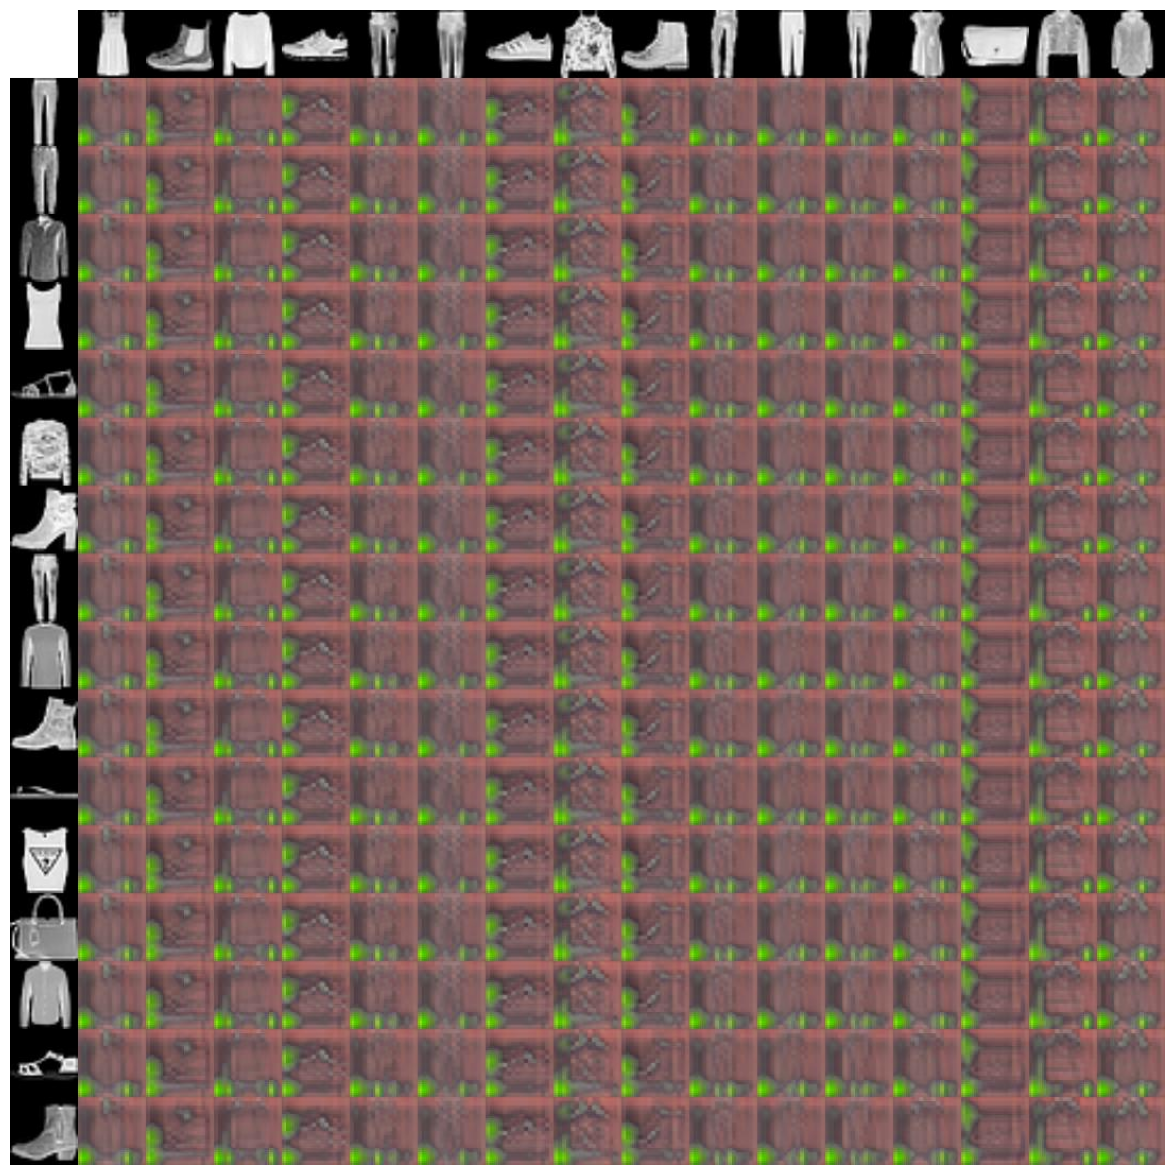

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# 가장 최근에 생성된 샘플 이미지 찾기
sample_files = sorted(glob.glob('expr/samples/*.jpg'))

if sample_files:
    last_sample = sample_files[-1] # 가장 최근 파일
    print(f"Displaying: {last_sample}")

    img = mpimg.imread(last_sample)
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("아직 생성된 샘플이 없습니다. 조금 더 학습을 기다려주세요 (최소 1000 iter).")